<a href="https://colab.research.google.com/github/YounseoKim62/python_for_DA/blob/main/4_park_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내용

-

## 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False # 음수가 깨질때

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

## 데이터 불러오기

### 데이터 불러오고 확인

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/4. 도시공원 표준 데이터로 데이터 전처리 익히기/전국도시공원표준데이터.csv',
                 encoding = 'cp949')

df.head()

Mounted at /content/drive


관리번호    공원명   공원구분 소재지도로명주소                 소재지지번주소         위도  \
0  26440-00001   구랑공원   문화공원      NaN    부산광역시 강서구 구랑동 1199-7  35.157215   
1  26440-00002   압곡공원   근린공원      NaN      부산광역시 강서구 구랑동 1219  35.154655   
2  26440-00003  서연정공원    소공원      NaN   부산광역시 강서구 대저1동 1330-7  35.216183   
3  26440-00004   용두공원  어린이공원      NaN  부산광역시 강서구 대저2동 1870-67  35.183679   
4  26440-00005  새동내공원  어린이공원      NaN   부산광역시 강서구 대저2동 2407-1  35.174568   

           경도     공원면적 공원보유시설(운동시설)         공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  128.854935   9137.0            4                  NaN          화장실   
1  128.854727  33756.0            4                  NaN          NaN   
2  128.969558    646.0            7                  NaN          NaN   
3  128.956007   1620.0          NaN           조합놀이기구, 그네          NaN   
4  128.950612   1009.0            8  조합놀이기구, 그네, 흔들놀이기구2          NaN   

  공원보유시설(교양시설)                                       공원보유시설(기타시설)       지정고시일  \
0          NaN  팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...  2011-09-02   
1          NaN  배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...  2008-02-28   
2          NaN            앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4  2013-01-23   
3          NaN                                      정자, 농구장, 평의자6  1998-07-25   
4          NaN                         정자, 평의자14, 트렐리스2, 안내판, 볼라드  1995-04-07   

              관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명  Unnamed: 19  
0  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
1  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
2  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
3  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN  
4  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구          NaN

### ydata profiling (pandas profiling)

In [4]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=daa9fe1d43bfde2a7c256ad749c62fb00fecc7c16b88793295833f78fe73575e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [5]:
import ydata_profiling
from ydata_profiling import ProfileReport

# 직접 ydata_profiling 소스코드로 접근하여 폰트를 재설정해줘야 함
#plt.rc("font", family="NanumGothic")
sns.set(font="NanumGothic")

%time profile = ProfileReport(df, title = '도시공원 표준 데이터')
profile.to_file(output_file = '/content/drive/MyDrive/데이터 분석/공부/4. 도시공원 표준 데이터로 데이터 전처리 익히기/park_pandas_profile.html')

CPU times: user 33.8 ms, sys: 1.07 ms, total: 34.9 ms
Wall time: 123 ms


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7aa59358d160, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.savefig(
/usr/local/lib/python

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/visualisation/utils.py:73: UserWarning: Glyph 44540 (\N{HANGUL SY

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 데이터 요약

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

### 결측치 확인

In [7]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [8]:
# 결측치 비율 구하기
n = round(df.isnull().mean() * 100, 2)
n

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

Text(0, 0.5, 'columns')

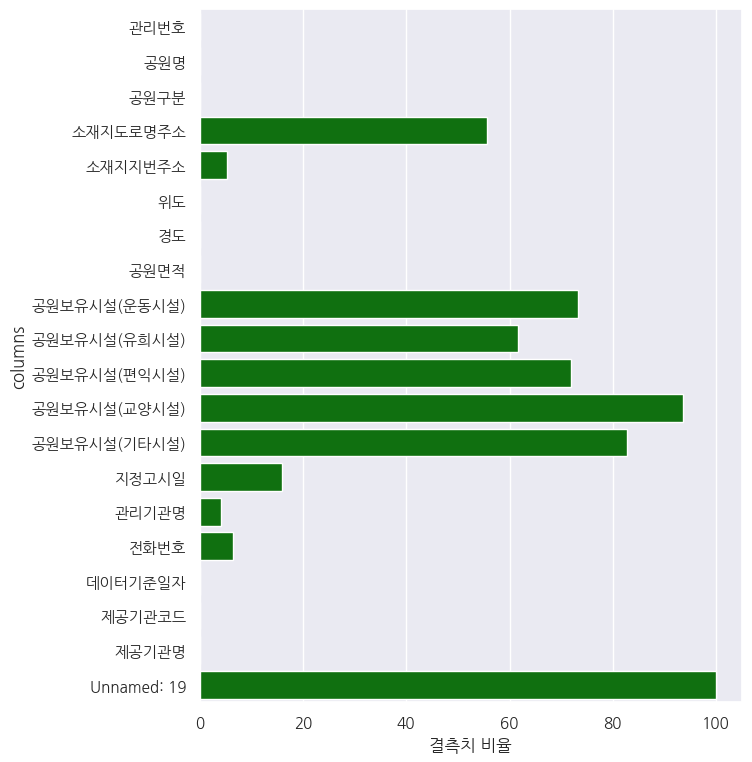

In [9]:
plt.figure(figsize = (7, 9))
sns.barplot(x = n.values, y = n.index, color = 'Green')
plt.xlabel('결측치 비율')
plt.ylabel('columns')

<Axes: >

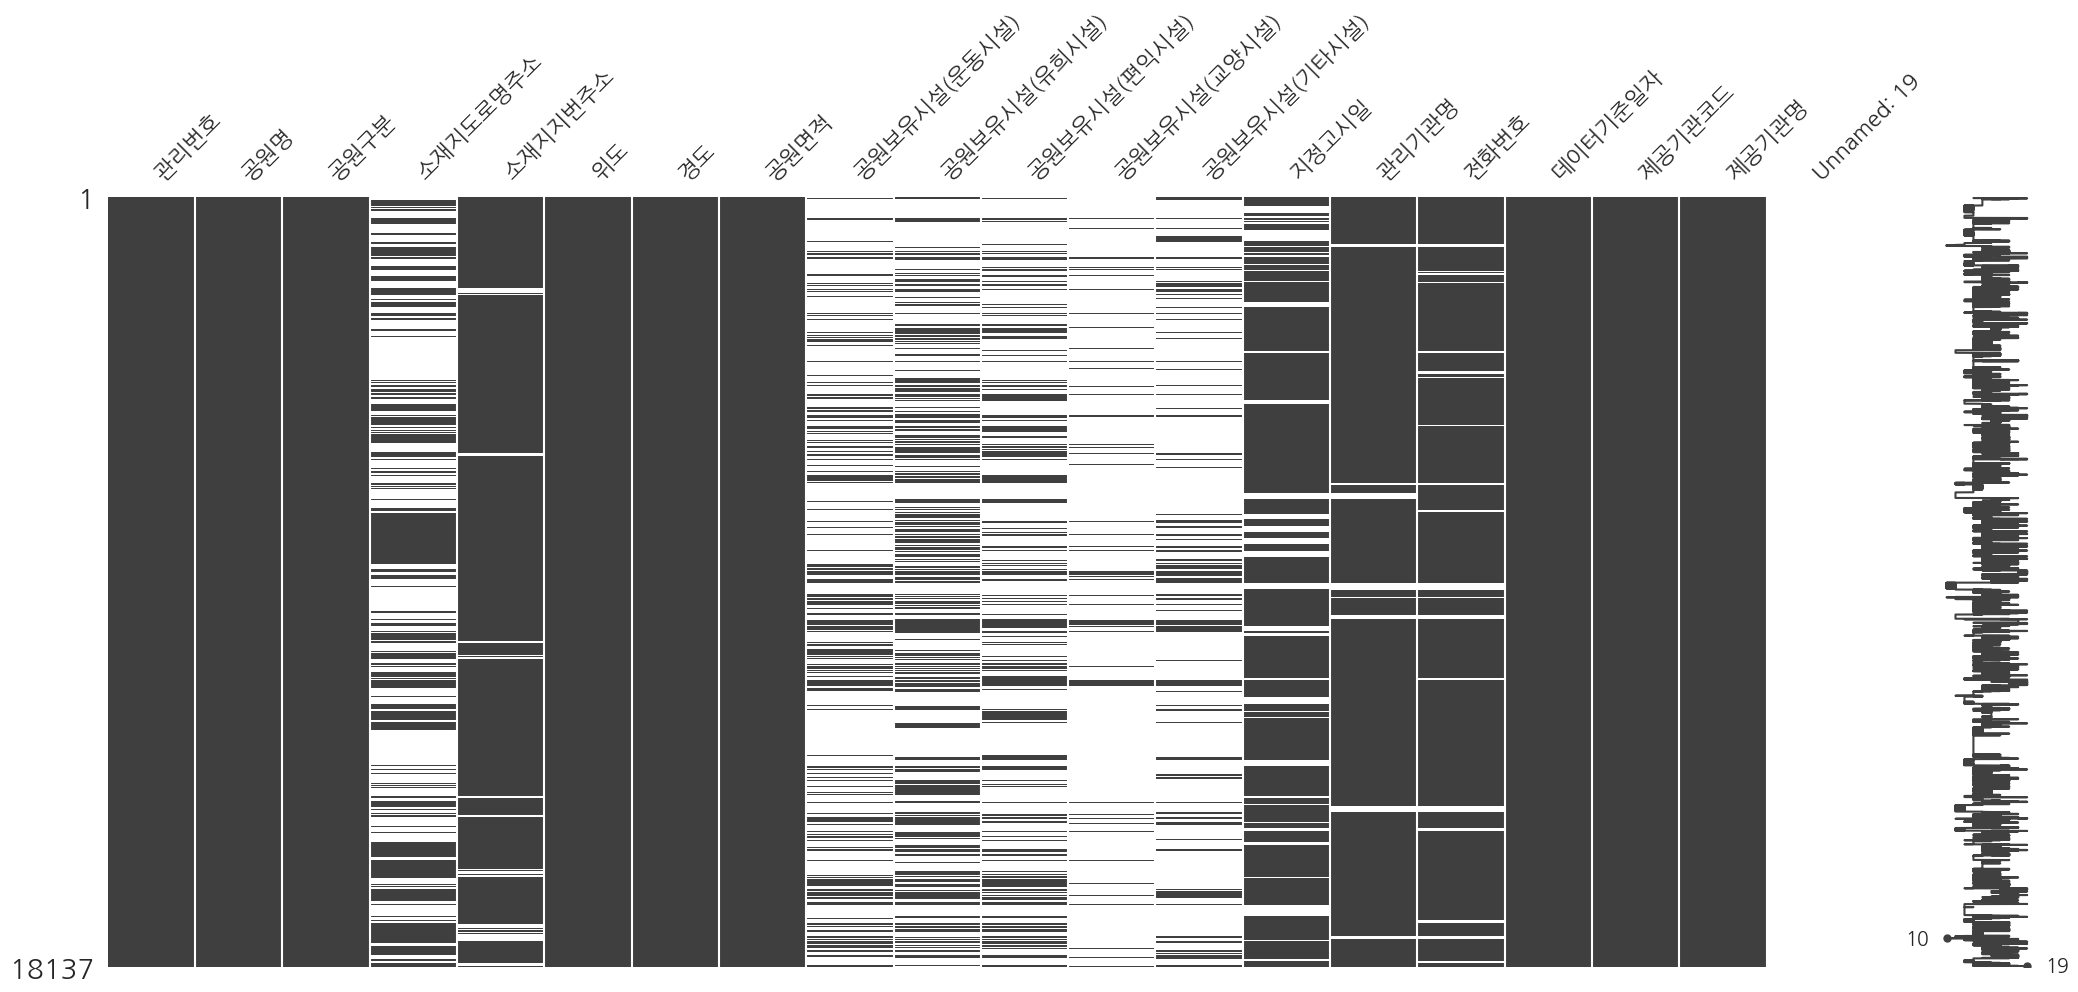

In [10]:
import missingno

missingno.matrix(df)

## 데이터 전처리

### 불필요한 columns 제거

In [11]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [12]:
df = df.drop(['Unnamed: 19'], axis = 1)

### 결측치 처리

In [13]:
df['소재지도로명주소'].isnull().sum()

10098

In [14]:
df['소재지지번주소'].isnull().sum()

979

In [15]:
# '소재지도로명주소'의 결측값을 '소재지지번주소'로 대체
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])

In [16]:
# 결측치가 잘 처리되었는지 확인
df['소재지도로명주소'].isnull().sum()

0

### 파생변수 만들기

In [17]:
# '소재지도로명주소'를 사용하여 시도, 구군 변수 생성하기
df['시도'] = df['소재지도로명주소'].str.split(expand = True)[0]
df[['소재지도로명주소', '시도']].head(3)

소재지도로명주소     시도
0   부산광역시 강서구 구랑동 1199-7  부산광역시
1     부산광역시 강서구 구랑동 1219  부산광역시
2  부산광역시 강서구 대저1동 1330-7  부산광역시

In [18]:
df['구군'] = df['소재지도로명주소'].str.split(expand = True)[0]
df[['소재지도로명주소', '구군']].head(3)

소재지도로명주소     구군
0   부산광역시 강서구 구랑동 1199-7  부산광역시
1     부산광역시 강서구 구랑동 1219  부산광역시
2  부산광역시 강서구 대저1동 1330-7  부산광역시

In [19]:
# 시도 데이터의 빈도수 확인
df['시도'].value_counts()

시도
경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: count, dtype: int64

In [20]:
# '강원'을 '강원도'로 변경
df['시도'] = df['시도'].replace('강원', '강원도')
df['시도'].value_counts()

시도
경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: count, dtype: int64

### 이상치 제거

- 경도, 위도의 이상치 처리하기

<Axes: xlabel='경도', ylabel='위도'>

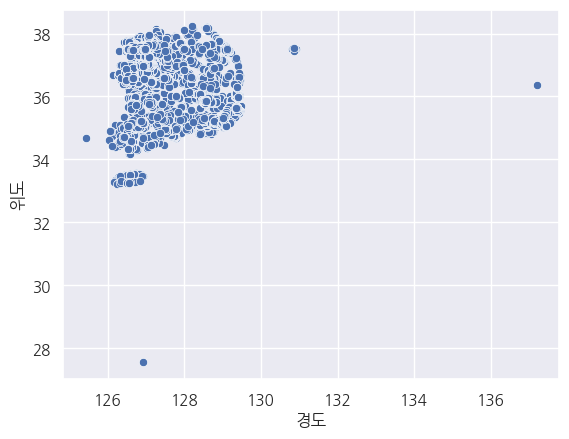

In [21]:
sns.scatterplot(data = df, x = '경도', y = '위도')

In [22]:
# 위도, 경도가 잘못입력된 데이터를 확인
df[(df['경도'] > 132) | (df['위도'] < 32)]

관리번호          공원명  공원구분                   소재지도로명주소  \
374    11440-00004         와우공원  근린공원  서울특별시 마포구 창전동3-231 등 59필지   
12926  43113-00080  근린공원5(만수공원)  근린공원   충청북도 청주시 흥덕구 오송읍 만수리 512   

                         소재지지번주소         위도          경도     공원면적 공원보유시설(운동시설)  \
374    서울특별시 마포구 창전동3-231 등 59필지  27.551606  126.929047  73590.0          NaN   
12926   충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0          NaN   

      공원보유시설(유희시설)  ... 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
374            NaN  ...          NaN          NaN  1940-03-12   
12926          NaN  ...          NaN          NaN  2003-04-18   

                         관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명  \
374                  서울특별시 마포구  02-3153-9553  2019-07-22  3130000  서울특별시 마포구   
12926  충청북도 청주시 푸른도시사업본부 공원관리과  043-201-4433  2019-06-21  5710000   충청북도 청주시   

          시도     구군  
374    서울특별시  서울특별시  
12926   충청북도   충청북도  

[2 rows x 21 columns]

In [23]:
# 주소를 통하여 정확한 위도와 경도를 확인
# 와우공원의 위도는 37.551606, 경도는 126.929047
# 근린공원5(만수공원)의 위도는 36.374204, 경도는 137.202661

df.loc[(df['공원명'] == '와우공원') & (df['공원구분'] == '근린공원'), '위도'] = 37.551606
df.loc[df['공원명'] == '근린공원5(만수공원)', '경도'] = 137.202661

In [24]:
# 제대로 변경되었는지 확인
df.loc[(df['공원명'] == '와우공원') | (df['공원명'] == '근린공원5(만수공원)')]

관리번호          공원명   공원구분                   소재지도로명주소  \
374    11440-00004         와우공원   근린공원  서울특별시 마포구 창전동3-231 등 59필지   
12926  43113-00080  근린공원5(만수공원)   근린공원   충청북도 청주시 흥덕구 오송읍 만수리 512   
17067  26350-00049         와우공원  어린이공원         부산광역시 해운대구 좌동 1452   

                         소재지지번주소         위도          경도     공원면적 공원보유시설(운동시설)  \
374    서울특별시 마포구 창전동3-231 등 59필지  37.551606  126.929047  73590.0          NaN   
12926   충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0          NaN   
17067         부산광역시 해운대구 좌동 1452  35.164887  129.181161   1878.6          NaN   

      공원보유시설(유희시설)  ... 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
374            NaN  ...          NaN          NaN  1940-03-12   
12926          NaN  ...          NaN          NaN  2003-04-18   
17067          NaN  ...          NaN          NaN  1992-08-06   

                         관리기관명          전화번호     데이터기준일자   제공기관코드       제공기관명  \
374                  서울특별시 마포구  02-3153-9553  2019-07-22  3130000   서울특별시 마포구   
12926  충청북도 청주시 푸른도시사업본부 공원관리과  043-201-4433  2019-06-21  5710000    충청북도 청주시   
17067               해운대구청 늘푸른과           NaN  2019-05-10  3330000  부산광역시 해운대구   

          시도     구군  
374    서울특별시  서울특별시  
12926   충청북도   충청북도  
17067  부산광역시  부산광역시  

[3 rows x 21 columns]

### 날짜 데이터 처리

In [25]:
df['지정고시일'].head(3)

0    2011-09-02
1    2008-02-28
2    2013-01-23
Name: 지정고시일, dtype: object

In [26]:
# '지정고시일'의 데이터 타입을 datetime 형태로 변경
df['지정고시일'] = pd.to_datetime(df['지정고시일'])
df['지정고시일'].head(3)

0   2011-09-02
1   2008-02-28
2   2013-01-23
Name: 지정고시일, dtype: datetime64[ns]

In [27]:
# '고시연도'와 '고시월'을 '지정고시일'에서 추출
df['고시연도'] = df['지정고시일'].dt.year
df['고시월'] = df['지정고시일'].dt.month

df[['지정고시일', '고시연도', '고시월']].head()

지정고시일    고시연도  고시월
0 2011-09-02  2011.0  9.0
1 2008-02-28  2008.0  2.0
2 2013-01-23  2013.0  1.0
3 1998-07-25  1998.0  7.0
4 1995-04-07  1995.0  4.0

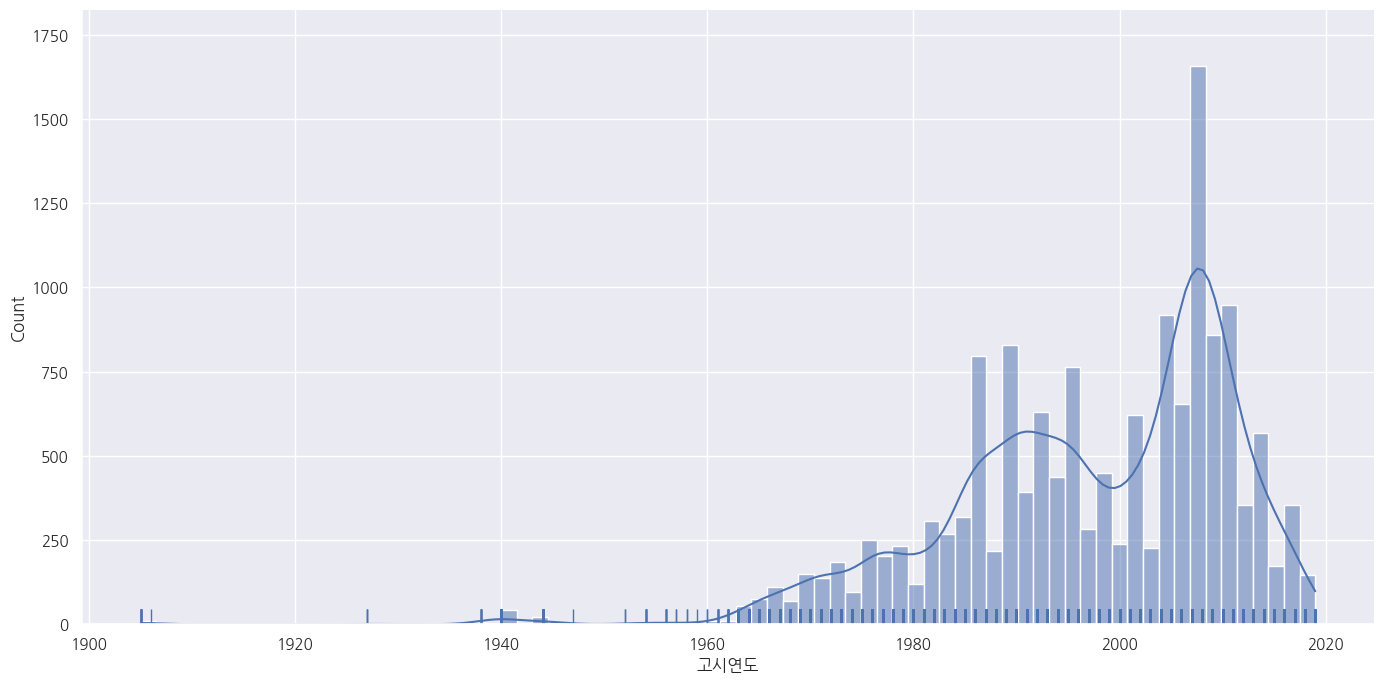

In [28]:
# '고시연도'의 분포를 displot 으로 시각화
sns.displot(x = df.loc[df['고시연도'].notnull(), '고시연도'],
            rug = True,
            kde = True,
            height = 7,
            aspect = 2)

In [29]:
# 연도와 월별 고시 현황을 pivot_table로 표현
year_month = pd.pivot_table(data = df,
                            index = '고시연도',
                            columns = '고시월',
                            values = '공원명',
                            aggfunc = 'count')
year_month = year_month.loc[(year_month.index > 2000) & (year_month.index < 2019)]
year_month.astype(int).style.background_gradient()

### 텍스트 데이터 처리

#### 정규표현식

* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|

#### 표현식 설명

|표현식 | 설명 |
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [30]:
import re

#### 공원 보유시설 (운동시설)

In [31]:
pd.options.display.max_columns = 100

In [32]:
df.head(1)

관리번호   공원명  공원구분              소재지도로명주소               소재지지번주소  \
0  26440-00001  구랑공원  문화공원  부산광역시 강서구 구랑동 1199-7  부산광역시 강서구 구랑동 1199-7   

          위도          경도    공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0  35.157215  128.854935  9137.0            4          NaN          화장실   

  공원보유시설(교양시설)                                       공원보유시설(기타시설)      지정고시일  \
0          NaN  팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안... 2011-09-02   

              관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명     시도  \
0  부산광역시 강서구청 녹지공원과  051-970-4536  2019-05-02  3360000  부산광역시 강서구  부산광역시   

      구군    고시연도  고시월  
0  부산광역시  2011.0  9.0

In [33]:
pd.options.display.max_rows = 1500
df['공원보유시설(운동시설)'].value_counts()

공원보유시설(운동시설)
운동기구                                                                                                                                360
농구장                                                                                                                                 271
체력단련시설                                                                                                                              224
배드민턴장                                                                                                                               187
야외운동기구                                                                                                                              105
운동기구 등                                                                                                                               99
-                                                                                                                                    82
게이트볼장                                                                                                                                80
족구장                                                                                                                                  76
체력단련기구                                                                                                                               53
농구대,운동기구                                                                                                                             52
미조성                                                                                                                                  45
0                                                                                                                                    40
농구대                                                                                                                                  40
다목적운동장                                                                                                                               40
체육시설                                                                                                                                 38
3                                                                                                                                    31
간이운동기구                                                                                                                               30
축구장                                                                                                                                  29
N                                                                                                                                    28
5                                                                                                                                    27
야외헬스기구                                                                                                                               27
헬스형 운동기구 등                                                                                                                           27
게이트볼구장,운동기구                                                                                                                          26
6                                                                                                                                    25
4                                                                                                                                    23
다목적구장                                                                                                                                22
야외헬스형운동기구 3개                                                                                                                         22
야외헬스형운동기구 4개                                                                                                                         20
해당없음                                       

In [34]:
# '공원보유시설(운동시설)'의 unique 값들을 구하여 리스트 형태로 변환
gym = df['공원보유시설(운동시설)'].unique().tolist()
gym = str(gym)
gym

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [35]:
# '를 , 로 +를 , 로 공백을 , 로 / 를 ,로 변경
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [36]:
# '[', 모든 숫자 (\d), '-', nan, '.', ']'를 제거
gym = re.sub('[\[\d\-nan\.\]]', '', gym)

# ','가 2번 연속으로 나오는 것들을 ',' 1개로 변경
gym = re.sub(',{2,}', ',', gym)

gym

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [37]:
# ','를 통해 split을 하여 list로 만든 후
# pandas series로 변경

gym_count = pd.Series(gym.split(',')).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
Name: count, dtype: int64

Text(0.5, 0, '운동기구')

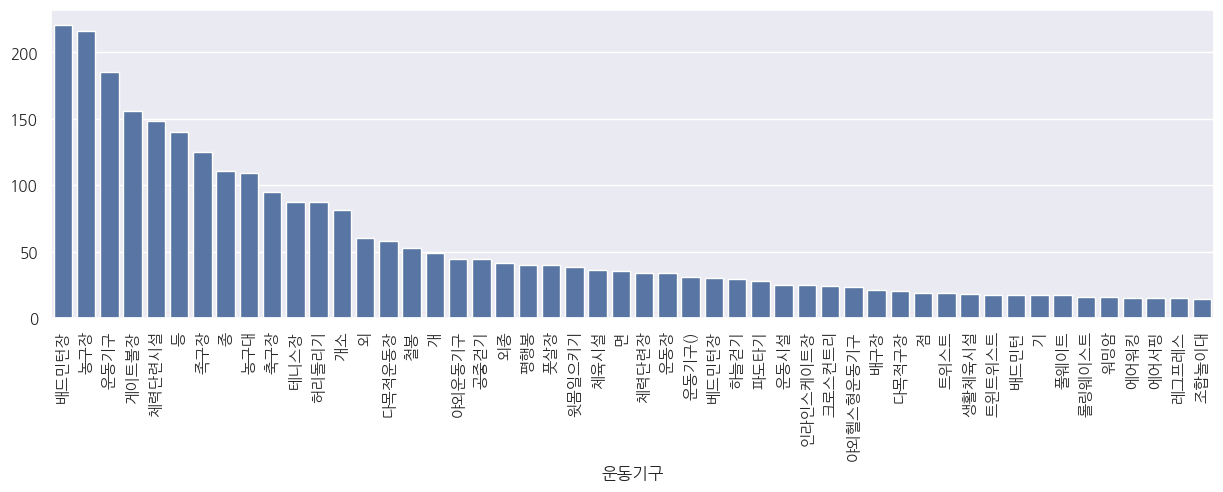

In [38]:
# 상위 50개의 운동기구를 시각화
plt.figure(figsize = (15, 4))
sns.barplot(x = gym_count.head(50).index, y = gym_count.head(50).values)
plt.xticks(rotation = 90)
plt.xlabel('운동기구')

#### 워드클라우드로 빈도수 표현하기

In [39]:
!pip install wordcloud
from wordcloud import WordCloud

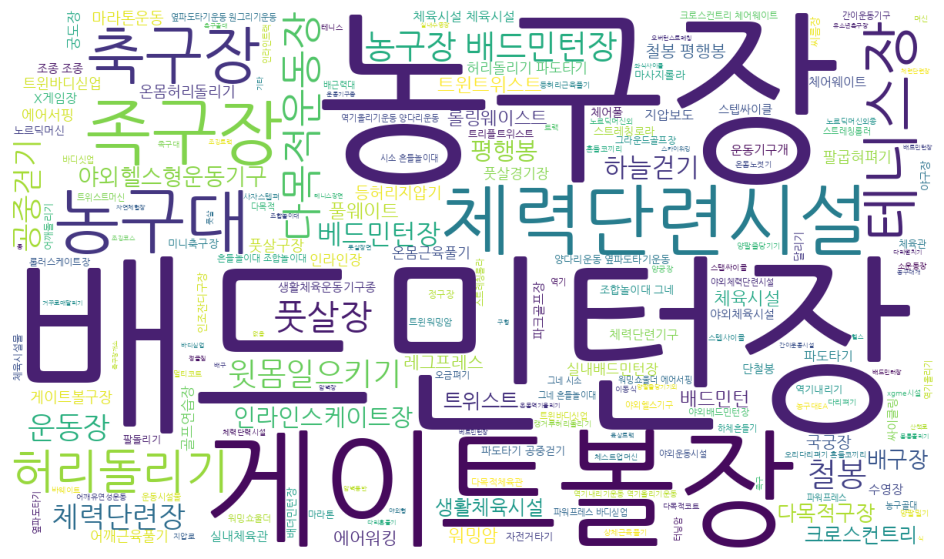

In [40]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      width = 1200,
                      height = 700,
                      stopwords = ['운동기구', '등', '종', '개소', '외', '개', '외종', '면', '야외운동기구', '운동기구()', '운동시설', '점', '기'],
                      background_color = 'white',
                      random_state =42
                      ).generate(gym)
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 편익시설

In [41]:
df['공원보유시설(편익시설)'].value_counts()

공원보유시설(편익시설)
화장실                                                                                                                                                                      1037
벤치                                                                                                                                                                        193
정자,벤치                                                                                                                                                                     137
음수대                                                                                                                                                                       127
파고라                                                                                                                                                                       116
정자,화장실,벤치                                                                                                                                                                 106
-                                                                                                                                                                         101
조합놀이대 등                                                                                                                                                                    98
주차장                                                                                                                                                                        87
주차장, 화장실                                                                                                                                                                   85
등의자, 평의자                                                                                                                                                                   81
쉼터 및 휴게소 등                                                                                                                                                                 78
화장실, 주차장                                                                                                                                                                   57
파고라 등                                                                                                                                                                      55
화장실 1동                                                                                                                                                                     54
주차장,화장실                                                                                                                                                                    49
파고라, 의자                                                                                                                                                                    40
없음                                                                                                                                                                         40
정자, 의자                                                                                                                                                                     40
등의자 등                                                                                                                                                                      36
정자                                                                                                                                                                         35
파고라 및 벤치 등                                                                                                                                                                 32
N                                                                                                                                                              

In [42]:
amenity = df['공원보유시설(편익시설)'].unique().tolist()
amenity = str(amenity)
amenity

"['화장실', nan, '화장실2, 주차장, 관리사무소', '화장실2', '화장실, 주차장', '문화회관', '음수전', '음수전, 주차장', '주차장, 화장실', '-', '축구장, 화장실, 주차장', '야영장, 운동장, 화장실, 주차장', '화장실, 주차장, 무대', '주차장, 화장실, 저수지, 산책로', '축구장', '주차장', '화장실 2개소, 어린이놀이터1개소', '화장실 1개소, 어린이놀이터1개소', '어린이놀이터1개소', '주차장,화장실', '대피소2, 사무소1, 약수터3, 교량 10, 통제소 4, 화장실 20, 파고라 8, 탐방지원센터 1', '정보문화센터, 배드민턴장, 인조잔디축구장', '배구장, 배드민턴장, 테니스장, 휴게광장,체력단련장, 청소년문화회관', '화장실, 조합놀이대, 배드민턴장', '조합놀이대, 의자 등', '조합놀이대, 의자, 바닥분수 등', '조합놀이대, 의자', '의자, 운동기구 등', '조합놀이대, 의자, 화장실 등', '모험놀이, 의자 등', '조합놀이대, 그네, 화장실 등', '조합놀이대, 의자, 벽천분수 등', '자판기, 화장실', '파고라1,평의자5', '등의자2,원형쉘터1,평의자6,오두막1', '평벤치16,등벤치6,정자4', '평벤치22,파고라1', '등벤치5,평벤치6,파고라1', '등벤치6,평벤치12,파고라1', '등벤치6,파고라1', '등벤치8,평벤치10,정자1', '등벤치3,평벤치4,파고라2', '평벤치6', '등벤치3,평벤치4,파고라1', '등벤치6,정자1', '등벤치4,평벤치4,파고라1', '평벤치2,정자1,구형의자1', '등벤치10,파고라1', '등벤치8,정자1', '등벤치7,정자2', '등벤치6,원두막1', '평벤치4,파고라1', '등벤치5,정자1,파고라1', '등벤치8,평벤치4,정자2', '등벤치8,ㄱ자의자1,정자1,파고라1,원형벤치1', '등벤치7,평벤치7', '원두막1,야외테이블2', '등벤치5,정자1', '등벤치3,평벤치7,정자1', '등벤치6,원형벤치3,정자1', '등의자5,원형의자3,정자2

In [43]:
amenity = amenity.replace("'", ",").replace("/", ",").replace(" ", ",").replace("+", ",")
amenity

'[,화장실,,,nan,,,화장실2,,주차장,,관리사무소,,,,화장실2,,,,화장실,,주차장,,,,문화회관,,,,음수전,,,,음수전,,주차장,,,,주차장,,화장실,,,,-,,,,축구장,,화장실,,주차장,,,,야영장,,운동장,,화장실,,주차장,,,,화장실,,주차장,,무대,,,,주차장,,화장실,,저수지,,산책로,,,,축구장,,,,주차장,,,,화장실,2개소,,어린이놀이터1개소,,,,화장실,1개소,,어린이놀이터1개소,,,,어린이놀이터1개소,,,,주차장,화장실,,,,대피소2,,사무소1,,약수터3,,교량,10,,통제소,4,,화장실,20,,파고라,8,,탐방지원센터,1,,,,정보문화센터,,배드민턴장,,인조잔디축구장,,,,배구장,,배드민턴장,,테니스장,,휴게광장,체력단련장,,청소년문화회관,,,,화장실,,조합놀이대,,배드민턴장,,,,조합놀이대,,의자,등,,,,조합놀이대,,의자,,바닥분수,등,,,,조합놀이대,,의자,,,,의자,,운동기구,등,,,,조합놀이대,,의자,,화장실,등,,,,모험놀이,,의자,등,,,,조합놀이대,,그네,,화장실,등,,,,조합놀이대,,의자,,벽천분수,등,,,,자판기,,화장실,,,,파고라1,평의자5,,,,등의자2,원형쉘터1,평의자6,오두막1,,,,평벤치16,등벤치6,정자4,,,,평벤치22,파고라1,,,,등벤치5,평벤치6,파고라1,,,,등벤치6,평벤치12,파고라1,,,,등벤치6,파고라1,,,,등벤치8,평벤치10,정자1,,,,등벤치3,평벤치4,파고라2,,,,평벤치6,,,,등벤치3,평벤치4,파고라1,,,,등벤치6,정자1,,,,등벤치4,평벤치4,파고라1,,,,평벤치2,정자1,구형의자1,,,,등벤치10,파고라1,,,,등벤치8,정자1,,,,등벤치7,정자2,,,,등벤치6,원두막1,,,,평벤치4,파고라1,,,,등벤치5,정자1,파고라1,,,,등벤치8,평벤치4,정자2,,,,등벤치8,ㄱ자의자1,정자1,파고라1,원형벤치1,,,,등벤치7,평벤치7,,,,원두막1,야외테이블2,,,,등벤치5,정자1,,,,등벤치3,평벤치7,정자1,,,,등벤치6,원형벤치3,정자1,,,,등의자5,원형의자3,정자2

In [44]:
amenity = re.sub("[\[\]\(\)\d\nan\-\.\/\·\_]", "", amenity)
amenity = re.sub(",{2,}", ",", amenity)
amenity

',화장실,화장실,주차장,관리사무소,화장실,화장실,주차장,문화회관,음수전,음수전,주차장,주차장,화장실,축구장,화장실,주차장,야영장,운동장,화장실,주차장,화장실,주차장,무대,주차장,화장실,저수지,산책로,축구장,주차장,화장실,개소,어린이놀이터개소,화장실,개소,어린이놀이터개소,어린이놀이터개소,주차장,화장실,대피소,사무소,약수터,교량,통제소,화장실,파고라,탐방지원센터,정보문화센터,배드민턴장,인조잔디축구장,배구장,배드민턴장,테니스장,휴게광장,체력단련장,청소년문화회관,화장실,조합놀이대,배드민턴장,조합놀이대,의자,등,조합놀이대,의자,바닥분수,등,조합놀이대,의자,의자,운동기구,등,조합놀이대,의자,화장실,등,모험놀이,의자,등,조합놀이대,그네,화장실,등,조합놀이대,의자,벽천분수,등,자판기,화장실,파고라,평의자,등의자,원형쉘터,평의자,오두막,평벤치,등벤치,정자,평벤치,파고라,등벤치,평벤치,파고라,등벤치,평벤치,파고라,등벤치,파고라,등벤치,평벤치,정자,등벤치,평벤치,파고라,평벤치,등벤치,평벤치,파고라,등벤치,정자,등벤치,평벤치,파고라,평벤치,정자,구형의자,등벤치,파고라,등벤치,정자,등벤치,정자,등벤치,원두막,평벤치,파고라,등벤치,정자,파고라,등벤치,평벤치,정자,등벤치,ㄱ자의자,정자,파고라,원형벤치,등벤치,평벤치,원두막,야외테이블,등벤치,정자,등벤치,평벤치,정자,등벤치,원형벤치,정자,등의자,원형의자,정자,등벤치,원형벤치,정자,야외테이블,난간,등벤치,정자,등벤치,정자,화장실남,여,평벤치,정자,등벤치,평벤치,정자,등벤치,정자,원형벤치,등벤치,등벤치,평벤치,야외탁자,원두막,쓰레기통,쓰레기단지,등벤치,평벤치,정자,등벤치,벤치,원형벤치,정자,등벤치,평벤치,정자,화장실,정자,의자,화장실,파고라,의자,화장실,파고라,의자,화장실,파고라,의자,화장실,정자,의자,의자,화장실,정자,의자,화장실,정자,평상,화장실,정자,의자,화장실,파고라,의자,화장실,정자,화장실,정자,화장실,화장실,파고라,의자,주차장,매점,화장실,주차장,화장실,화장실,개소,화장실,개소,없음,파고라,평의자,파고라,벤치,벤치,안내소,화장실,

In [45]:
amenity_count = pd.Series(amenity.split(",")).value_counts()
amenity_count

파고라                 394
화장실                 355
주차장                 195
의자                  194
음수대                 162
평의자                 125
정자                  125
등의자                 123
벤치                  115
등                    63
개소                   47
자전거보관대               46
등벤치                  44
앉음벽                  43
매점                   36
전망대                  29
평벤치                  29
장의자                  24
육각정자                 20
평상                   19
음수전                  19
관리사무소                19
동                    18
개                    17
종합안내판                16
휴지통                  15
원두막                  14
사각정자                 13
공중화장실                12
공원안내판                12
사각파고라                11
시계탑                  10
기                    10
음수장                   9
등의자A                  9
팔각정자                  9
평의자E                  9
평의자D                  9
쓰레기통                  8
야외탁자                  8
조합놀이대                 8
공원등                   8
외종                    8
볼라드                   8
무대                    7
쉼터                    7
산책로                   7
휴게쉼터                  7
피크닉테이블                7
간이화장실                 7
안내판                   7
방향안내판                 7
및                     6
식                     6
자전거거치대                6
놀이터이용안내판              6
사각평상                  6
전통정자                  6
데크식                   6
정각                    6
원형벤치                  6
CCTV                  6
바닥분수                  6
약수터                   6
금연안내판                 6
먹는물공동시설               5
오석벤치세트                5
식당                    5
관리실                   5
원형파고라D                5
공중전화                  5
파고자                   5
휴게음식점                 5
전망데크                  5
휴게소                   5
야외테이블                 5
오석의자                  4
e                     4
퍼걸러                   4
분수대                   4
등의자B                  4
외                     4
사각파고라A                4
발마사지                  4
원형파고라A                4
조합놀이터                 4
평의자B                  4
배드민턴장                 3
통석의자                  3
팔각정                   3
관리동                   3
모듈벤치                  3
노인정                   3
파고라B                  3
분수                    3
평의자A                  3
방문자센터                 3
그늘막                   3
변소                    3
어린이놀이터개소              3
농구장                   3
샘터                    3
원형야외테이블               3
축구장                   3
공원종합안내판B              3
자전거                   2
스탠드                   2
조형평의자                 2
특화벤치A                 2
세족장                   2
테이블                   2
공원방향안내판B              2
조형벤치B                 2
보관대                   2
m                     2
휴게공간                  2
관리사                   2
램프                    2
발효식화장실                2
사각야외테이블               2
목교                    2
놀이터안내판                2
도서관                   2
종                     2
급수대                   2
개소대                   2
가제보                   2
탈의실                   2
휴계쉼터                  2
휀스                    2
음식점                   2
경로당                   2
자전거대                  2
이동식                   2
지하주차장                 2
급수시설                  2
데크로드                  2
광장                    2
계단                    2
                      2
사각파고라E                2
데크전망대                 2
그네                    2
안내소                   2
전망테크쉽터                2
세면대                   2
매표소                   2
휴게광장                  2
카페테리아                 2
테니스장                  2
주차장화장실                2
샤워장                   2
케이블카                  2
데크전망대A                2
야영장                   2
운동장                   2
웰빙유스호스텔               2
화장실주차장                2
원형쉘터                  1
오두막                   1
여                     1
화장실남                  1
파고라등                  1
소규모운동시설               1
막파고라                  1
마을회관                  1
동의              

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, '파고라'),
  Text(1, 0, '화장실'),
  Text(2, 0, '주차장'),
  Text(3, 0, '의자'),
  Text(4, 0, '음수대'),
  Text(5, 0, '평의자'),
  Text(6, 0, '정자'),
  Text(7, 0, '등의자'),
  Text(8, 0, '벤치'),
  Text(9, 0, '등'),
  Text(10, 0, '개소'),
  Text(11, 0, '자전거보관대'),
  Text(12, 0, '등벤치'),
  Text(13, 0, '앉음벽'),
  Text(14, 0, '매점'),
  Text(15, 0, '전망대'),
  Text(16, 0, '평벤치'),
  Text(17, 0, '장의자'),
  Text(18, 0, '육각정자'),
  Text(19, 0, '평상'),
  Text(20, 0, '음수전'),
  Text(21, 0, '관리사무소'),
  Text(22, 0, '동'),
  Text(23, 0, '개'),
  Text(24, 0, '종합안내판'),
  Text(25, 0, '휴지통'),
  Text(26, 0, '원두막'),
  Text(27, 0, '사각정자'),
  Text(28, 0, '공중화장실'),
  Text(29, 0, '공원안내판'),
  Text(30, 0, '사각파고라'),
  Text(31, 0, '시계탑'),
  Text(32, 0

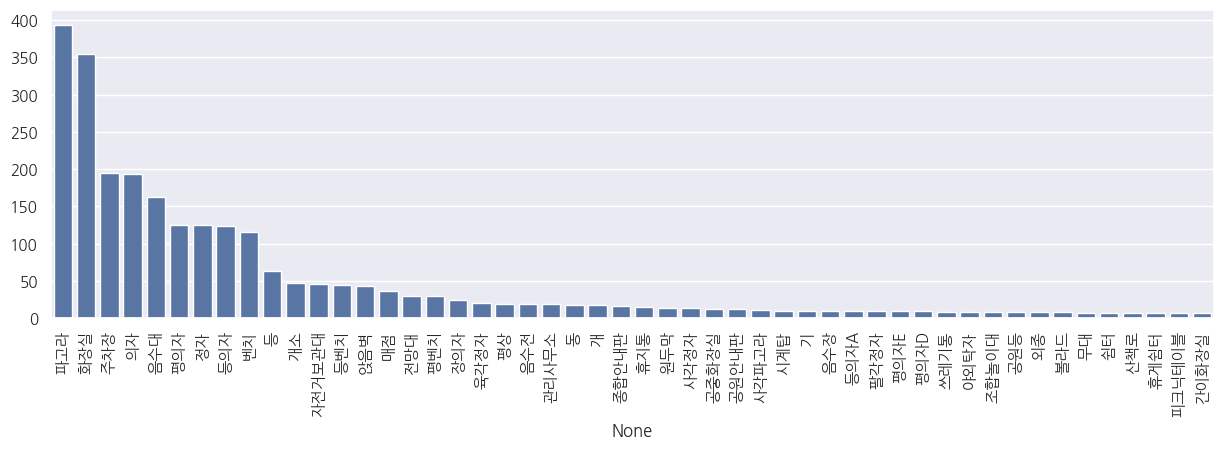

In [46]:
plt.figure(figsize = (15, 4))
sns.barplot(x = amenity_count.head(50).index, y = amenity_count.head(50).values)
plt.xticks(rotation = 90)

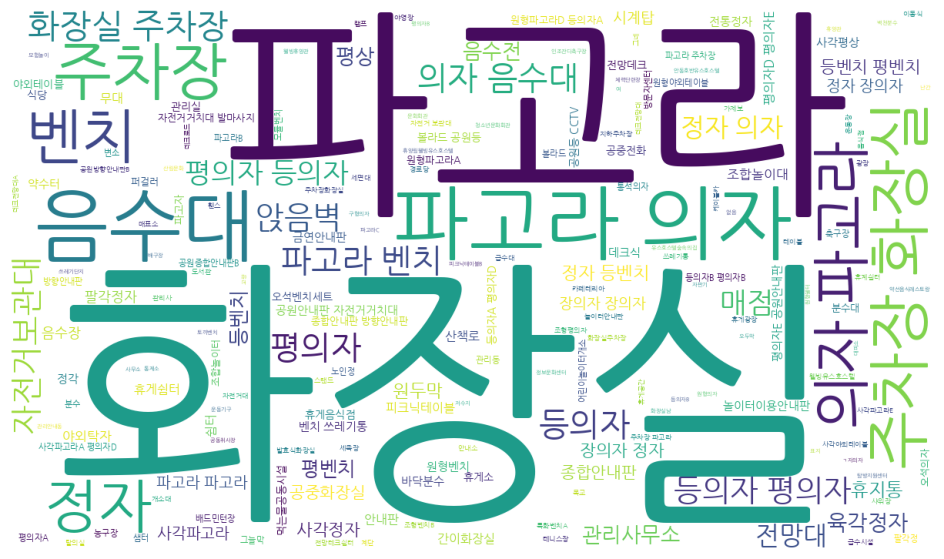

In [47]:
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                      width = 1200,
                      height = 700,
                      stopwords = ['등', '개소', '동', '개', '기', '외종', '및', '식', 'e', '외', 'm', '종'],
                      background_color = 'white',
                      random_state =42
                      ).generate(amenity)
plt.figure(figsize = (15, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 키워드 별 빈도수 구하기
- 빈도수를 구해보니 '화장실', '공중화장실'등 두 개의 단어가 다른 빈도로 세어짐
- 일일이 전처리를 하면 좋지만 예외가 많음
- 키워드를 넣고 빈도수를 구하는것이 전처리 보다 빠를 때도 있음

In [48]:
facilities = ['화장실', '주차장', '음수대', '파고다', '정자',
              '벤치', '의자', '놀이터', '축구장', '야영장', 'CCTV']

df_fac = df.loc[df['공원보유시설(편익시설)'].notnull()]

In [49]:
for i in facilities:
  df[i] = df_fac['공원보유시설(편익시설)'].str.contains(i)

In [50]:
df[facilities].sum()

화장실     2208
주차장      611
음수대      493
파고다        0
정자       648
벤치       850
의자       949
놀이터       21
축구장        6
야영장        3
CCTV       6
dtype: object

### 특정 정보 마스킹 (정규표현식 연습)

#### 전화번호 마스킹

In [51]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다.
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "010-1234-5678")

'010-12**-**78'

In [52]:
# 가운데가 3 자리일때 번호 마스킹이 잘 되는지 확인 '814-123-4567'

re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", "814-123-4567")

'814-1**-**67'

In [53]:
# df에 적용하기
# lambda를 사용하여 간단한 함수를 사용할 수 있음
df['전화번호'] = df['전화번호'].astype(str)
df['전화번호(마스킹)'] = df['전화번호'].apply(lambda x: re.sub("(\d{3})-(\d{1,2})(\d{2})-(\d{2})(\d{2})", r"\1-\2**-**\5", x))

#### 이메일 주소 마스킹

In [55]:
email = 'address@gmail.com'

re.sub('[^@.]', 'x', email)

'xxxxxxx@xxxxx.xxx'

In [56]:
email = 'address@gmail.com'

address, domain = email.split('@')
mask = re.sub('\w', '*', address[1:-1])
print(f'{address[0]}{mask}{address[-1]}@{domain}')
print(email)

a*****s@gmail.com
address@gmail.com


In [59]:
def mask_email(email):
  address, domain = email.split('@')
  mask = re.sub('\w', '*', address[1: -1])
  return f'{address[0]}{mask}{address[-1]}@{domain}'

mask_email('asd3912@psu.edu')

'a*****2@psu.edu'

## 데이터 요약

### 수치형 변수 요약

In [63]:
numeric = df.dtypes[df.dtypes != 'object']
numeric = numeric.index.tolist()
numeric

['위도', '경도', '공원면적', '지정고시일', '고시연도', '고시월']

array([[<Axes: title={'center': '위도'}>, <Axes: title={'center': '경도'}>],
       [<Axes: title={'center': '공원면적'}>,
        <Axes: title={'center': '지정고시일'}>],
       [<Axes: title={'center': '고시연도'}>,
        <Axes: title={'center': '고시월'}>]], dtype=object)

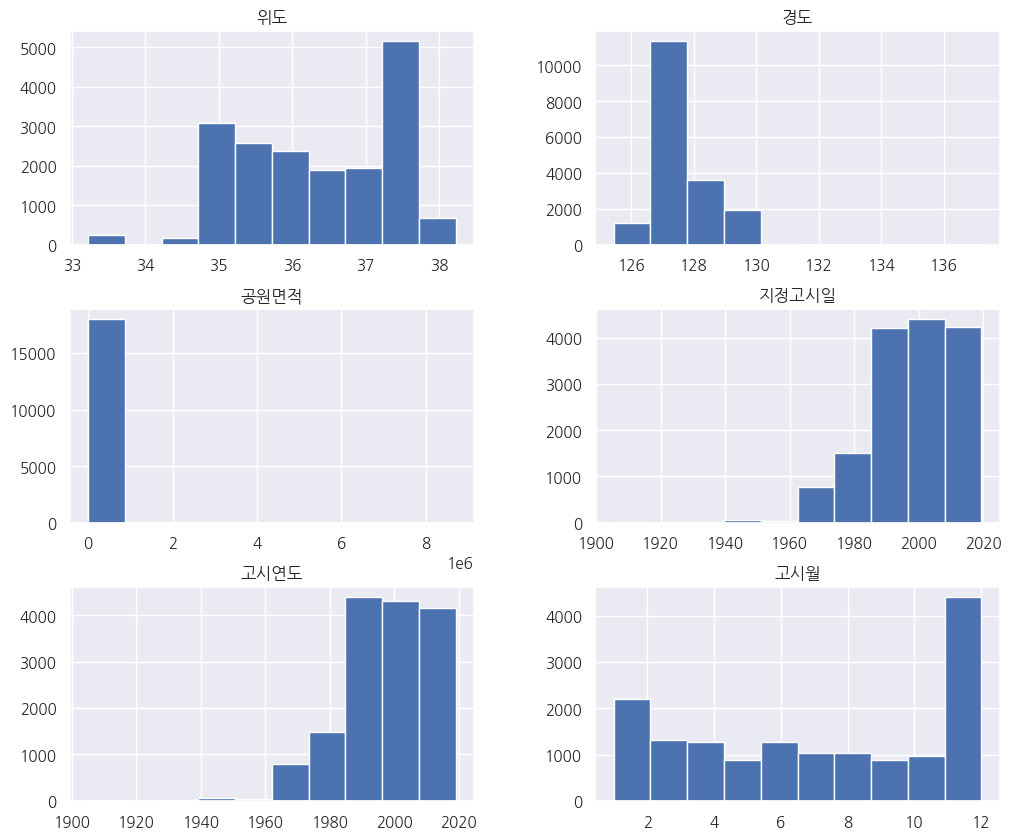

In [66]:
df.hist(figsize = (12, 10))

In [67]:
df.describe()

위도            경도          공원면적  \
count  18137.000000  18137.000000  1.813700e+04   
mean      36.336474    127.543937  3.781196e+04   
min       33.218670    125.430955  0.000000e+00   
25%       35.275447    126.872301  1.503000e+03   
50%       36.364746    127.130926  2.159000e+03   
75%       37.404399    128.466193  1.025460e+04   
max       38.224926    137.202661  8.703000e+06   
std        1.049850      0.892670  2.203052e+05   

                               지정고시일          고시연도           고시월  
count                          15225  15225.000000  15225.000000  
mean   1997-10-15 01:47:32.334975232   1997.238555      7.097274  
min              1905-06-19 00:00:00   1905.000000      1.000000  
25%              1989-08-07 00:00:00   1989.000000      4.000000  
50%              2000-06-30 00:00:00   2000.000000      7.000000  
75%              2008-05-08 00:00:00   2008.000000     11.000000  
max              2019-05-04 00:00:00   2019.000000     12.000000  
std                              NaN     13.592078      3.753724

### 범주형 변수 요약

In [68]:
objects = df.dtypes[df.dtypes == 'object']
objects = objects.index.tolist()
objects

['관리번호',
 '공원명',
 '공원구분',
 '소재지도로명주소',
 '소재지지번주소',
 '공원보유시설(운동시설)',
 '공원보유시설(유희시설)',
 '공원보유시설(편익시설)',
 '공원보유시설(교양시설)',
 '공원보유시설(기타시설)',
 '관리기관명',
 '전화번호',
 '데이터기준일자',
 '제공기관코드',
 '제공기관명',
 '시도',
 '구군',
 '화장실',
 '주차장',
 '음수대',
 '파고다',
 '정자',
 '벤치',
 '의자',
 '놀이터',
 '축구장',
 '야영장',
 'CCTV',
 '전화번호(마스킹)']

In [69]:
df.describe(include = 'object')

관리번호    공원명   공원구분                  소재지도로명주소  \
count         18137  18137  18137                     18137   
unique        14710  12423     10                     15186   
top     31110-60001     공원  어린이공원  전라남도 무안군 삼향읍 남악리 미지정 간척지   
freq            124    145   9987                        18   

                         소재지지번주소 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
count                      17158         4845         6964         5084   
unique                     14419         1485         1237         1102   
top     전라남도 무안군 삼향읍 남악리 미지정 간척지         운동기구        조합놀이대          화장실   
freq                          18          360         1526         1037   

       공원보유시설(교양시설) 공원보유시설(기타시설)      관리기관명   전화번호     데이터기준일자   제공기관코드  \
count          1160         3116      17383  18137       18137    18137   
unique          378          993        279    498         112      219   
top               -            -  경상남도 창원시청    nan  2019-09-24  5670000   
freq            250          141       1176   1180        1344     1176   

           제공기관명     시도     구군    화장실    주차장    음수대    파고다     정자     벤치  \
count      18137  18137  18137   5084   5084   5084   5084   5084   5084   
unique       219     17     18      2      2      2      1      2      2   
top     경상남도 창원시    경기도    경기도  False  False  False  False  False  False   
freq        1176   3318   3318   2876   4473   4591   5084   4436   4234   

           의자    놀이터    축구장    야영장   CCTV 전화번호(마스킹)  
count    5084   5084   5084   5084   5084     18137  
unique      2      2      2      2      2       478  
top     False  False  False  False  False       nan  
freq     4135   5063   5078   5081   5078      1180

### crosstab

In [71]:
manage_cat = pd.crosstab(index = df['관리기관명'], columns = df['공원구분'])
manage_cat[manage_cat['체육공원'] > 5].style.background_gradient()

In [72]:
city_cat = pd.crosstab(index = df['시도'], columns = df['공원구분'])
city_cat.style.background_gradient()

## 시도별 공원 분포

### 시도별 공원 비율

In [75]:
city_count = df['시도'].value_counts().to_frame()
city_mean = df['시도'].value_counts(normalize = True).to_frame()
city_count.head()

count
시도          
경기도     3318
전라남도    1882
경상남도    1825
서울특별시   1745
충청남도    1723

In [78]:
city = city_count.merge(city_mean, left_index = True, right_index = True)
city.columns = ['합계', '비율']
city.style.background_gradient()

### 공원구분별 분포

<Axes: xlabel='경도', ylabel='위도'>

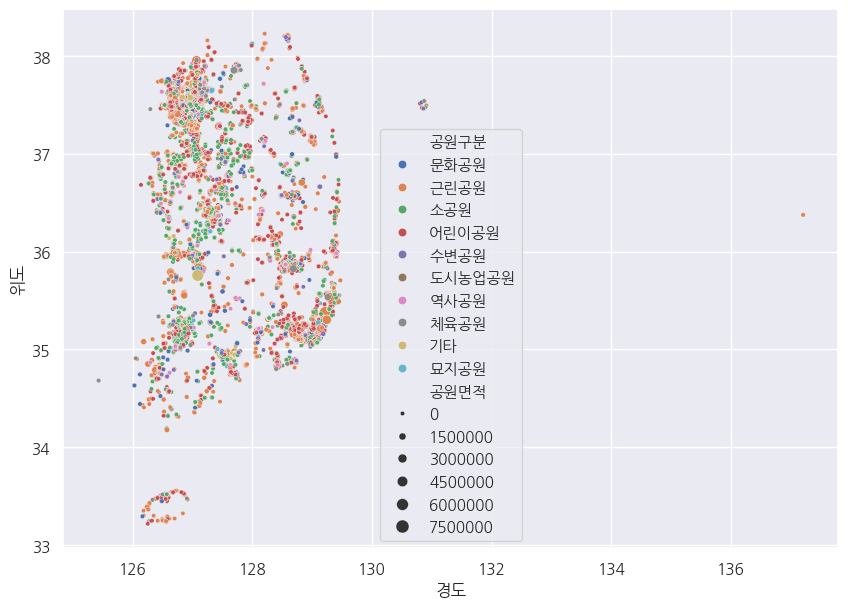

In [85]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df,
                x = '경도',
                y = '위도',
                hue = '공원구분',
                size = '공원면적',
                sizes = (10, 100))

### 시도별 공원분포

<Axes: xlabel='경도', ylabel='위도'>

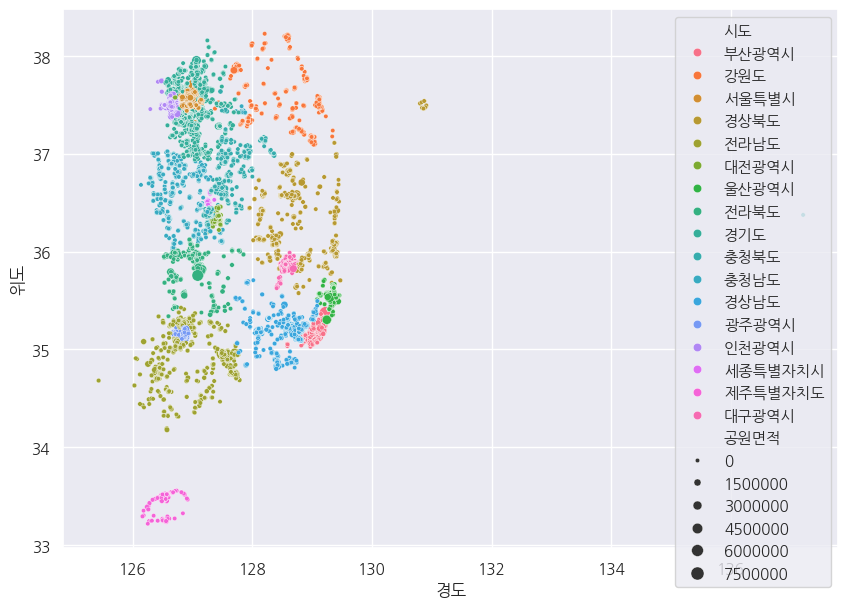

In [86]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df,
                x = '경도',
                y = '위도',
                hue = '시도',
                size = '공원면적',
                sizes = (10, 100))

<ipython-input-87-b010b82a0671>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , y = '시도', order = city_count.index, palette = 'Greens_r')


<Axes: xlabel='count', ylabel='시도'>

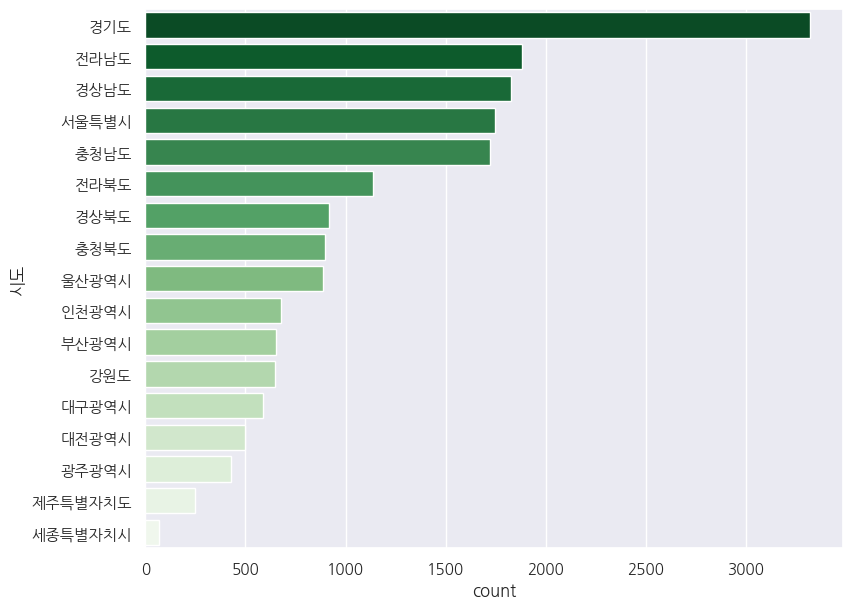

In [87]:
plt.figure(figsize = (9, 7))
sns.countplot(data = df , y = '시도', order = city_count.index, palette = 'Greens_r')

### 특정 공원구분 가져오기

In [88]:
df['공원구분'].value_counts()

공원구분
어린이공원     9987
근린공원      4170
소공원       2647
문화공원       322
수변공원       301
기타         260
체육공원       230
역사공원       164
묘지공원        43
도시농업공원      13
Name: count, dtype: int64

In [97]:
park_type = r'(역사|체육|수변|문화)공원'

park = df.loc[df['공원구분'].str.contains(park_type)]
park

<ipython-input-97-497c0964682e>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  park = df.loc[df['공원구분'].str.contains(park_type)]


관리번호                       공원명  공원구분  \
0      26440-00001                      구랑공원  문화공원   
23     26440-00024                    철새탐방공원  문화공원   
26     26440-00027                      남강공원  문화공원   
28     26440-00029                      범방공원  문화공원   
48     26440-00049                      생활공원  문화공원   
60     26440-00061                 사구범방대수변공원  수변공원   
61     26440-00062                   가리새수변공원  수변공원   
94     42110-00023                      문화공원  문화공원   
95     42110-00024                      문화공원  문화공원   
123    42110-00052                        공원  수변공원   
124    42110-00053                        공원  수변공원   
125    42110-00054                        공원  수변공원   
209    42110-00138                      역사공원  역사공원   
210    42110-00139                    의암체육공원  체육공원   
211    42110-00140                    동내체육공원  체육공원   
212    42110-00141                   손흥민체육공원  체육공원   
336    11710-00124                 오금지구 수변공원  수변공원   
366    11710-00154                     방이동고분  역사공원   
367    11710-00155                   백제초기적석총  역사공원   
442    11440-00072                    밤섬문화공원  문화공원   
443    11440-00073                  서강나루문화공원  문화공원   
444    11440-00074                   당인동문화공원  문화공원   
445    11440-00075                    가온문화공원  문화공원   
446    11440-00076                   DMC문화공원  문화공원   
447    11440-00077                    물빛문화공원  문화공원   
448    11440-00078                    휴암문화공원  문화공원   
449    11440-00079                    홍익문화공원  문화공원   
450    11440-00080                   양화진역사공원  역사공원   
527    47840-00016                   고분군사적공원  역사공원   
528    47840-00020                    학산체육공원  체육공원   
529    46230-00001                        우산  문화공원   
576    46230-00050                      명당제2  수변공원   
577    46230-00051                       배알도  수변공원   
757    46710-00130                      노채공원  수변공원   
758    46710-00131                  대나무생태공원1  수변공원   
771    46710-00144                      유천공원  역사공원   
772    46710-00145                담양일반산업단지공원  체육공원   
785    30200-00137                   죽동지구(1)  문화공원   
793    30200-00130                        안샘  수변공원   
816    30200-00107                     작은내공원  수변공원   
817    30200-00106                      도안공원  문화공원   
818    30200-00105                      욧골공원  문화공원   
819    30200-00104                    유성온천공원  문화공원   
990    11350-00069                   한무리문화공원  문화공원   
1029   11350-00108                   등나무문화공원  문화공원   
1032   11350-00111                    마들체육공원  체육공원   
1057   26260-00010                  복천동고분군공원  역사공원   
1058   26260-00011                     충렬사공원  역사공원   
1144   11320-00049                  다락원 체육공원  체육공원   
1223   31110-20001                      체육공원  체육공원   
1224   31110-30001                     태화루공원  역사공원   
1225   31110-30002                      북정공원  역사공원   
1226   31110-30004                    다운역사공원  역사공원   
1227   31110-40001                    다전생태공원  수변공원   
1228   31110-40001                  115 수변공원  수변공원   
1229   31110-40001                  114 수변공원  수변공원   
1230   31110-40001                  113 수변공원  수변공원   
1243   31110-30003                      98공원  역사공원   
1321   45180-10101                     정읍사공원  문화공원   
1338   41500-00003                      수변공원  수변공원   
1415   30140-00044                       우리들  문화공원   
1505   42210-00042                      역사공원  역사공원   
1506   42210-00043                      문화공원  문화공원   
1507   42210-00044                      수변공원  수변공원   
1508   42210-00045                   청초천수변공원  수변공원   
1620   11650-00112                        우면  수변공원   
1621   11650-00113                  서초종합체육공원  체육공원   
1636   47170-00019                    단호샌드파크  수변공원   
1648   47170-00069                    퇴계문화공원  문화공원   
1651   47170-00074             11호수변공원(도청이전)  수변공원   
1657   47170-00095                  원이엄마테마파크  역사공원   
1660   47170-00103             10호수변공원(도청이전)  수변공원   
1661   47170-00112             12호수변공원(도청이전)  수변공원   
1662   47170-00115

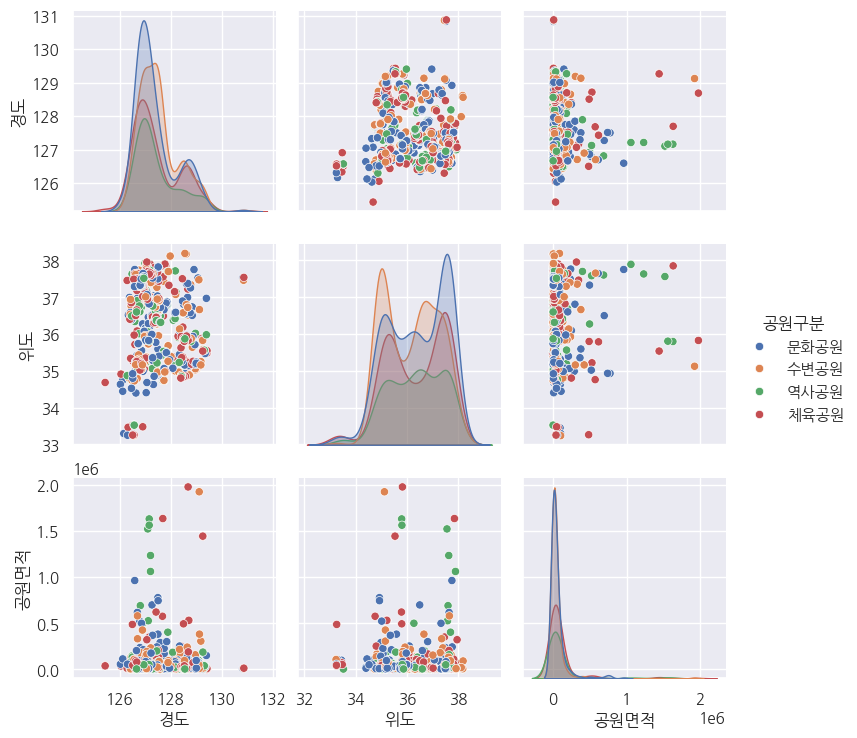

In [98]:
sns.pairplot(park[['경도', '위도', '공원면적', '공원구분']], hue = '공원구분')

### 피봇테이블로 시도별 공원수와 평균면적 구하기

In [100]:
park_size = pd.pivot_table(data = df,
                           index = '시도',
                           values = '공원면적',
                           aggfunc = ['count', 'mean', 'median'])
park_size.style.background_gradient()

### 내가 사는 지역의 공원을 지도에 표시하기

In [118]:
df_bundang = df[(df['제공기관명'] == '경기도 성남시') & (df['소재지도로명주소'].str.contains('분당구'))]
df_bundang

관리번호                공원명   공원구분                       소재지도로명주소  \
3047  41135-00002               율동공원   근린공원            경기도 성남시 분당구 문정로 145   
3048  41135-00004               서현공원   근린공원            경기도 성남시 분당구 이매동 산57   
3049  41135-00006               탑골공원   근린공원            경기도 성남시 분당구 야탑동 195   
3050  41135-00007               성지공원   근린공원          경기도 성남시 분당구 야탑동 195-1   
3051  41135-00008               상희공원   근린공원            경기도 성남시 분당구 야탑동 271   
3052  41135-00009               점골공원   근린공원            경기도 성남시 분당구 서현동 342   
3053  41135-00010               태현공원   근린공원             경기도 성남시 분당구 분당동 88   
3054  41135-00011               맹산공원   근린공원           경기도 성남시 분당구 분당동 64-1   
3055  41135-00012               당골공원   근린공원             경기도 성남시 분당구 분당동 37   
3056  41135-00013               중앙공원   근린공원           경기도 성남시 분당구 성남대로 550   
3057  41135-00014              황새울공원   체육공원           경기도 성남시 분당구 황새울로 287   
3058  41135-00015               마루공원   근린공원           경기도 성남시 분당구 수내동 49-1   
3059  41135-00016               능골공원   근린공원            경기도 성남시 분당구 정자동 103   
3060  41135-00017               정자공원   근린공원            경기도 성남시 분당구 정자동 252   
3061  41135-00018               주택공원   근린공원             경기도 성남시 분당구 불정로 50   
3062  41135-00019               금곡공원   체육공원            경기도 성남시 분당구 금곡로 298   
3063  41135-00020           머내과학기술공원   근린공원             경기도 성남시 분당구 구미동 19   
3064  41135-00021               벌말공원   근린공원             경기도 성남시 분당구 구미동 67   
3065  41135-00022               오리공원   근린공원       경기도 성남시 분당구 구미동 193-1, 2   
3066  41135-00023              진고개공원   근린공원            경기도 성남시 분당구 구미동 209   
3067  41135-00024               석촌공원   근린공원            경기도 성남시 분당구 구미동 217   
3068  41135-00025               구미공원   근린공원             경기도 성남시 분당구 금곡로 90   
3069  41135-00026              맹산2공원   근린공원            경기도 성남시 분당구 판교로 628   
3070  41135-00027               수내공원   근린공원             경기도 성남시 분당구 수내동122   
3071  41135-00028        판교제1호(청계)공원   근린공원            경기도 성남시 분당구 운중동 872   
3072  41135-00029        판교제2호(운중)공원   근린공원         경기도 성남시 분당구 판교원로81번길 9   
3073  41135-00030        판교제3호(두밀)공원   근린공원            경기도 성남시 분당구 운중동 915   
3074  41135-00031        판교제4호(판교)공원   근린공원  경기도 성남시 분당구 운중로 225번길 37(판교동)   
3075  41135-00032        판교제6호(붓들)공원   근린공원            경기도 성남시 분당구 삼평동 697   
3076  41135-00033        판교제7호(송현)공원   근린공원          경기도 성남시 분당구 삼평동 717-2   
3077  41135-00034        판교제8호(화랑)공원   근린공원          경기도 성남시 분당구 대왕판교로 609   
3078  41135-00035       판교제9호(나들이)공원   근린공원          경기도 성남시 분당구 백현동 542-1   
3079  41135-00036      판교제10호(낙생대)공원   근린공원            경기도 성남시 분당구 판교역로 75   
3080  41135-00037  판교제11호(판교테크노파크)공원   근린공원     경기도 성남시 분당구 대왕판교로 644번길 12   
3081  41135-00038              꿈동산공원  어린이공원            경기도 성남시 분당구 야탑동 332   
3082  41135-00039               하늘공원  어린이공원            경기도 성남시 분당구 야탑동 337   
3083  41135-00040               야탑공원  어린이공원            경기도 성남시 분당구 야탑동 340   
3084  41135-00041               연꽃공원  어린이공원            경기도 성남시 분당구 야탑동 206   
3085  41135-00042               매향공원  어린이공원          경기도 성남시 분당구 야탑동 214-1   
3086  41135-00043               새싹공원  어린이공원            경기도 성남시 분당구 야탑동 208   
3087  41135-00044               ?속공원  어린이공원          경기도 성남시 분당구 야탑동 213-1   
3088  41135-00045               양촌공원  어린이공원            경기도 성남시 분당구 야탑동 178   
3089  41135-00046               중탑공원  어린이공원       경기도 성남시 분당구 매화로48번길 17-4   
3090  41135-00047                탑공원  어린이공원     경기도 성남시 분당구 야탑로111번길 12-14   
3091  41135-00048              종달새공원  어린이공원            경기도 성남시 분당구 야탑동 534   
3092  41135-00049              오야소공원  어린이공원            경기도 성남시 분당구 야탑동 509   
3093  41135-00050            무잡모퉁이공원  어린이공원            경기도 성남시 분당구 야탑동 529   
3094  41135-00051             장승백이공원  어린이공원            경기도 성남시 분당구 야탑동 516   
3095  41135-00052              무장들공원  어린이공원            경기도 성남시 분당구 야탑동 524   
3096  41135-00053               탑골공원  어린이공원            경기도 성남시 분당구 야탑동 521   
3097  41135-00054               목련공

In [119]:
df_bundang[["소재지도로명주소", "공원명"]].head()

소재지도로명주소   공원명
3047    경기도 성남시 분당구 문정로 145  율동공원
3048    경기도 성남시 분당구 이매동 산57  서현공원
3049    경기도 성남시 분당구 야탑동 195  탑골공원
3050  경기도 성남시 분당구 야탑동 195-1  성지공원
3051    경기도 성남시 분당구 야탑동 271  상희공원

#### 특정 공원 정보 찾아보기

In [120]:
# 중앙공원
df_bundang.loc[df_bundang['공원명'].str.contains('중앙'), ['공원명', '위도', '경도']]

공원명         위도          경도
3056  중앙공원  37.380307  127.121179

In [121]:
# 중앙공원의 시설
cols = ['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)']
df_bundang.loc[df_bundang['공원명'].str.contains('중앙'), cols]

공원보유시설(운동시설) 공원보유시설(유희시설)  공원보유시설(편익시설) 공원보유시설(교양시설)
3056  배드민턴장4, 게이트볼장, 체력단련장          NaN  변소, 전망대, 음수대    야외공연장, 묘원

#### 지도에 표시하기

In [126]:
import folium

m = folium.Map([37.380307, 127.121179], zoom_start = 13)

for n in df_bundang.index:
  lat = df_bundang.loc[n, '위도']
  long = df_bundang.loc[n, '경도']

  tooltip = df_bundang.loc[n, '공원명'] + ' ' + df_bundang.loc[n, '소재지도로명주소']

  folium.Marker(
      [lat, long],
      popup = folium.Popup(f'<i>{tooltip}<i>',
      max_width = 600,
      max_height = 600),
      tooltip = tooltip).add_to(m)

m